<a href="https://colab.research.google.com/github/T81oub/ANN-models/blob/main/TF2.0_ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANN (Artificial Neural Network) regression is a type of machine learning model that can be used for predicting continuous numeric values. Unlike classification tasks, where the goal is to predict a categorical label, regression tasks aim to predict a numerical output.



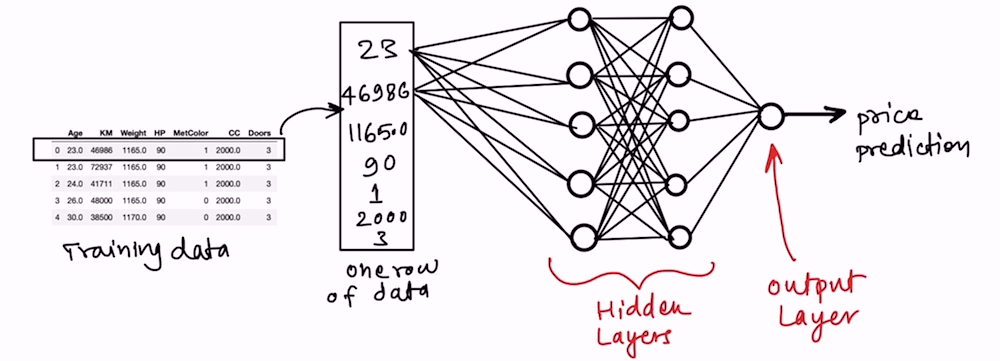

Here are the general steps to make and train an ANN model for regression:

1.   Import the required libraries, including TensorFlow or Keras, which provide a high-level API for building and training neural networks.
2.   Load the dataset for the regression task, which can be in the form of a CSV file or a database.
3.   Preprocess the data by scaling the features to be between 0 and 1, or by standardizing them to have zero mean and unit variance. This can help the neural network converge faster during training.
4.   Define the architecture of the neural network, including the number of layers, the number of neurons in each layer, and the activation functions. For regression tasks, the output layer typically has a single neuron with no activation function, since the goal is to predict a continuous output value.
5.   Compile the model by specifying the loss function, the optimizer, and the evaluation metric. For regression tasks, the mean squared error (MSE) loss function is commonly used, along with the Adam optimizer and the mean absolute error (MAE) or R-squared as the evaluation metric.
6.   Train the model by calling the fit() method, passing in the training data and labels, the batch size, the number of epochs, and the validation data. During training, the model will update its weights to minimize the loss on the training data.
7.   Evaluate the model on the test data using the evaluate() method, which returns the loss and evaluation metric on the test data.
8.   Make predictions on new data using the predict() method, which returns the model's output values for each input sample.

In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.11.0


In [2]:
# Other imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniformly distributed between (-3, +3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

This implements the function:

                                y = cos(2x1) + cos(3x2)

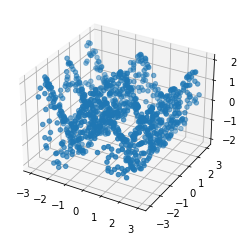

In [4]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
# plt.show()

In [5]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
  tf.keras.layers.Dense(1)
])

In [6]:
# Compile and fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.0598
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0005
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9538
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9339
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8727
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8174
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7336
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6538
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6724
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6105
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5412
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5290
Epoch 13/100
32/32 [=================

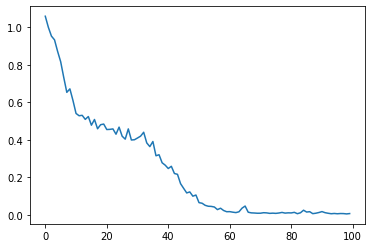

In [7]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

79/79 [==============================] - 0s 1ms/step


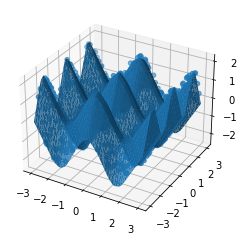

In [8]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

79/79 [==============================] - 0s 1ms/step


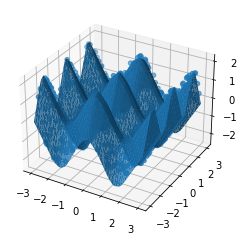

In [9]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()